# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
from keras import backend as K
from livelossplot import PlotLossesKeras
import keras
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split datasets
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X.astype(np.float))

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train.astype(np.float)), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test.astype(np.float)), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [6]:
Y_train = Y_train.reshape((-1, 1))

# As it is a regression problem the output is a neuron.

output_var = Y_train.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [7]:
from keras import initializers
import keras.optimizers as opts
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
# Parameters
learning_rate = 0.01

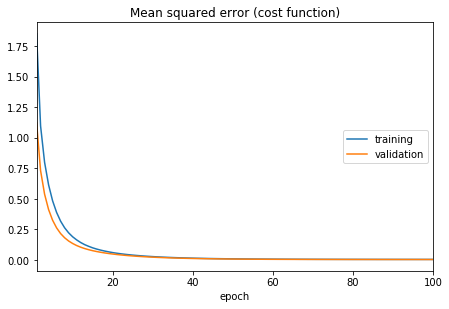

Mean squared error (cost function):
training   (min:    0.004, max:    1.852, cur:    0.004)
validation (min:    0.003, max:    1.125, cur:    0.003)


In [9]:
K.clear_session()
print('Building Model...')

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims, )))

op = opts.SGD(lr=learning_rate)
model.compile(optimizer=op, loss='mean_squared_error')

model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=[X_test,Y_test], 
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

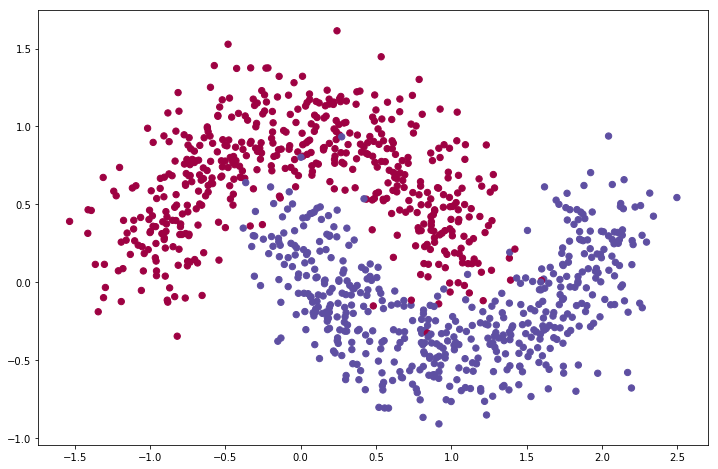

In [10]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [11]:
y_train = y_train.reshape((-1,1))

In [12]:
# As it is a regression problem the output is a neuron.
output_var = y_train.shape[1]
print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

1  output variables
2 input variables


In [16]:
K.clear_session()
print('Building Model...')

print('Model variables: ', dims)

classifier = Sequential()

#Hidden Layer
classifier.add(Dense(20, input_dim=dims, activation='relu'))

#Output Layer
classifier.add(Dense(output_var, activation='sigmoid'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(x_train,y_train, epochs=2000)

Building Model...
Model variables:  2
Epoch 1/2000
1000/1000 [==============================] - 0s 329us/step - loss: 0.5533 - acc: 0.7740
Epoch 2/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.4999 - acc: 0.8170
Epoch 3/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.4555 - acc: 0.8240
Epoch 4/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.4191 - acc: 0.8340
Epoch 5/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.3896 - acc: 0.8410
Epoch 6/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.3660 - acc: 0.8510
Epoch 7/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.3478 - acc: 0.8570
Epoch 8/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.3334 - acc: 0.8670
Epoch 9/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.3214 - acc: 0.8680
Epoch 10/2000
1000/1000 [==============================] - 0s

1000/1000 [==============================] - 0s 50us/step - loss: 0.1682 - acc: 0.9370
Epoch 82/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.1671 - acc: 0.9360
Epoch 83/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.1658 - acc: 0.9360
Epoch 84/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.1643 - acc: 0.9380
Epoch 85/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.1627 - acc: 0.9380
Epoch 86/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.1617 - acc: 0.9390
Epoch 87/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.1607 - acc: 0.9390
Epoch 88/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.1592 - acc: 0.9380
Epoch 89/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.1578 - acc: 0.9380
Epoch 90/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.1562 - acc: 0.9410
Epoc

1000/1000 [==============================] - 0s 49us/step - loss: 0.0948 - acc: 0.9710
Epoch 162/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0947 - acc: 0.9690
Epoch 163/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0944 - acc: 0.9710
Epoch 164/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0935 - acc: 0.9710
Epoch 165/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0928 - acc: 0.9710
Epoch 166/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0927 - acc: 0.9710
Epoch 167/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0920 - acc: 0.9730
Epoch 168/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0918 - acc: 0.9740
Epoch 169/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0914 - acc: 0.9730
Epoch 170/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0910 - acc: 0.

1000/1000 [==============================] - 0s 48us/step - loss: 0.0764 - acc: 0.9780
Epoch 242/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0763 - acc: 0.9780
Epoch 243/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0762 - acc: 0.9780
Epoch 244/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0762 - acc: 0.9760
Epoch 245/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0765 - acc: 0.9760
Epoch 246/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0759 - acc: 0.9780
Epoch 247/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0764 - acc: 0.9770
Epoch 248/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0757 - acc: 0.9780
Epoch 249/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0758 - acc: 0.9770
Epoch 250/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0758 - acc: 0.

1000/1000 [==============================] - 0s 44us/step - loss: 0.0716 - acc: 0.9790
Epoch 322/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0716 - acc: 0.9790
Epoch 323/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0715 - acc: 0.9770
Epoch 324/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0716 - acc: 0.9780
Epoch 325/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0714 - acc: 0.9800
Epoch 326/2000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0716 - acc: 0.9790
Epoch 327/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0714 - acc: 0.9780
Epoch 328/2000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0714 - acc: 0.9780
Epoch 329/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0713 - acc: 0.9790
Epoch 330/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0713 - acc: 0.

1000/1000 [==============================] - 0s 52us/step - loss: 0.0690 - acc: 0.9780
Epoch 402/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0692 - acc: 0.9780
Epoch 403/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0691 - acc: 0.9790
Epoch 404/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0690 - acc: 0.9770
Epoch 405/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0689 - acc: 0.9770
Epoch 406/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0691 - acc: 0.9790
Epoch 407/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0694 - acc: 0.9780
Epoch 408/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0689 - acc: 0.9790
Epoch 409/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0688 - acc: 0.9780
Epoch 410/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0690 - acc: 0.

1000/1000 [==============================] - 0s 52us/step - loss: 0.0673 - acc: 0.9780
Epoch 482/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0674 - acc: 0.9780
Epoch 483/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0675 - acc: 0.9780
Epoch 484/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0676 - acc: 0.9790
Epoch 485/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0673 - acc: 0.9780
Epoch 486/2000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0674 - acc: 0.9780
Epoch 487/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0674 - acc: 0.9780
Epoch 488/2000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0675 - acc: 0.9780
Epoch 489/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0674 - acc: 0.9790
Epoch 490/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0674 - acc: 0.

1000/1000 [==============================] - 0s 51us/step - loss: 0.0664 - acc: 0.9790
Epoch 562/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0665 - acc: 0.9780
Epoch 563/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0665 - acc: 0.9780
Epoch 564/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0667 - acc: 0.9790
Epoch 565/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0663 - acc: 0.9790
Epoch 566/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0662 - acc: 0.9780
Epoch 567/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0665 - acc: 0.9790
Epoch 568/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0664 - acc: 0.9790
Epoch 569/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0664 - acc: 0.9790
Epoch 570/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0664 - acc: 0.

1000/1000 [==============================] - 0s 59us/step - loss: 0.0659 - acc: 0.9790
Epoch 642/2000
1000/1000 [==============================] - 0s 96us/step - loss: 0.0659 - acc: 0.9790
Epoch 643/2000
1000/1000 [==============================] - 0s 75us/step - loss: 0.0658 - acc: 0.9790
Epoch 644/2000
1000/1000 [==============================] - 0s 64us/step - loss: 0.0659 - acc: 0.9790
Epoch 645/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0656 - acc: 0.9790
Epoch 646/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0657 - acc: 0.9790
Epoch 647/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0657 - acc: 0.9790
Epoch 648/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0659 - acc: 0.9790
Epoch 649/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0657 - acc: 0.9780
Epoch 650/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0658 - acc: 0.

1000/1000 [==============================] - 0s 50us/step - loss: 0.0655 - acc: 0.9790
Epoch 722/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0651 - acc: 0.9790
Epoch 723/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0655 - acc: 0.9790
Epoch 724/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0654 - acc: 0.9800
Epoch 725/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0654 - acc: 0.9790
Epoch 726/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0654 - acc: 0.9790
Epoch 727/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0652 - acc: 0.9790
Epoch 728/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0652 - acc: 0.9790
Epoch 729/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0655 - acc: 0.9780
Epoch 730/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0651 - acc: 0.

1000/1000 [==============================] - 0s 57us/step - loss: 0.0650 - acc: 0.9790
Epoch 802/2000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0649 - acc: 0.9790
Epoch 803/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0649 - acc: 0.9790
Epoch 804/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0647 - acc: 0.9790
Epoch 805/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0649 - acc: 0.9790
Epoch 806/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0650 - acc: 0.9800
Epoch 807/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0647 - acc: 0.9790
Epoch 808/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0650 - acc: 0.9790
Epoch 809/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0648 - acc: 0.9790
Epoch 810/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0648 - acc: 0.

1000/1000 [==============================] - 0s 58us/step - loss: 0.0645 - acc: 0.9800
Epoch 882/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0646 - acc: 0.9800
Epoch 883/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0644 - acc: 0.9800
Epoch 884/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0643 - acc: 0.9800
Epoch 885/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0644 - acc: 0.9800
Epoch 886/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0646 - acc: 0.9800
Epoch 887/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0650 - acc: 0.9800
Epoch 888/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0645 - acc: 0.9800
Epoch 889/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0647 - acc: 0.9800
Epoch 890/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0647 - acc: 0.

1000/1000 [==============================] - 0s 58us/step - loss: 0.0643 - acc: 0.9800
Epoch 962/2000
1000/1000 [==============================] - 0s 64us/step - loss: 0.0649 - acc: 0.9800
Epoch 963/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0642 - acc: 0.9800
Epoch 964/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0642 - acc: 0.9800
Epoch 965/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0643 - acc: 0.9800
Epoch 966/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0643 - acc: 0.9800
Epoch 967/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0646 - acc: 0.9810
Epoch 968/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0644 - acc: 0.9810
Epoch 969/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0643 - acc: 0.9810
Epoch 970/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0646 - acc: 0.

1000/1000 [==============================] - 0s 60us/step - loss: 0.0639 - acc: 0.9800
Epoch 1042/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0643 - acc: 0.9810
Epoch 1043/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0642 - acc: 0.9800
Epoch 1044/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0640 - acc: 0.9800
Epoch 1045/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0641 - acc: 0.9800
Epoch 1046/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0641 - acc: 0.9800
Epoch 1047/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0640 - acc: 0.9800
Epoch 1048/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0640 - acc: 0.9800
Epoch 1049/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0639 - acc: 0.9800
Epoch 1050/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0642 

1000/1000 [==============================] - 0s 63us/step - loss: 0.0639 - acc: 0.9800
Epoch 1121/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0639 - acc: 0.9800
Epoch 1122/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0641 - acc: 0.9800
Epoch 1123/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0641 - acc: 0.9790
Epoch 1124/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0643 - acc: 0.9800
Epoch 1125/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0638 - acc: 0.9800
Epoch 1126/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0640 - acc: 0.9800
Epoch 1127/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0641 - acc: 0.9800
Epoch 1128/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0639 - acc: 0.9800
Epoch 1129/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0637 

1000/1000 [==============================] - 0s 54us/step - loss: 0.0636 - acc: 0.9800
Epoch 1200/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0637 - acc: 0.9800
Epoch 1201/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0637 - acc: 0.9800
Epoch 1202/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0640 - acc: 0.9790
Epoch 1203/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0639 - acc: 0.9800
Epoch 1204/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0637 - acc: 0.9800
Epoch 1205/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0636 - acc: 0.9800
Epoch 1206/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0634 - acc: 0.9800
Epoch 1207/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0640 - acc: 0.9800
Epoch 1208/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0640 

1000/1000 [==============================] - 0s 62us/step - loss: 0.0635 - acc: 0.9810
Epoch 1279/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0637 - acc: 0.9810
Epoch 1280/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0637 - acc: 0.9780
Epoch 1281/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0636 - acc: 0.9810
Epoch 1282/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0638 - acc: 0.9810
Epoch 1283/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0634 - acc: 0.9800
Epoch 1284/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0638 - acc: 0.9790
Epoch 1285/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0638 - acc: 0.9770
Epoch 1286/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0632 - acc: 0.9800
Epoch 1287/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0636 

1000/1000 [==============================] - 0s 57us/step - loss: 0.0633 - acc: 0.9800
Epoch 1358/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0634 - acc: 0.9800
Epoch 1359/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0635 - acc: 0.9800
Epoch 1360/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0638 - acc: 0.9800
Epoch 1361/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0634 - acc: 0.9800
Epoch 1362/2000
1000/1000 [==============================] - 0s 55us/step - loss: 0.0639 - acc: 0.9770
Epoch 1363/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0636 - acc: 0.9780
Epoch 1364/2000
1000/1000 [==============================] - 0s 46us/step - loss: 0.0643 - acc: 0.9770
Epoch 1365/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0639 - acc: 0.9800
Epoch 1366/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0637 

1000/1000 [==============================] - 0s 56us/step - loss: 0.0635 - acc: 0.9800
Epoch 1437/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0635 - acc: 0.9800
Epoch 1438/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0636 - acc: 0.9800
Epoch 1439/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0635 - acc: 0.9790
Epoch 1440/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0634 - acc: 0.9800
Epoch 1441/2000
1000/1000 [==============================] - 0s 54us/step - loss: 0.0635 - acc: 0.9800
Epoch 1442/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0631 - acc: 0.9800
Epoch 1443/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0635 - acc: 0.9800
Epoch 1444/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0634 - acc: 0.9800
Epoch 1445/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0633 

1000/1000 [==============================] - 0s 49us/step - loss: 0.0641 - acc: 0.9800
Epoch 1516/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0634 - acc: 0.9810
Epoch 1517/2000
1000/1000 [==============================] - 0s 51us/step - loss: 0.0634 - acc: 0.9800
Epoch 1518/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0635 - acc: 0.9800
Epoch 1519/2000
1000/1000 [==============================] - 0s 50us/step - loss: 0.0637 - acc: 0.9800
Epoch 1520/2000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0634 - acc: 0.9800
Epoch 1521/2000
1000/1000 [==============================] - 0s 46us/step - loss: 0.0632 - acc: 0.9800
Epoch 1522/2000
1000/1000 [==============================] - 0s 45us/step - loss: 0.0633 - acc: 0.9800
Epoch 1523/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0636 - acc: 0.9800
Epoch 1524/2000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0636 

1000/1000 [==============================] - 0s 60us/step - loss: 0.0635 - acc: 0.9780
Epoch 1595/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0633 - acc: 0.9800
Epoch 1596/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0635 - acc: 0.9800
Epoch 1597/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0635 - acc: 0.9800
Epoch 1598/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0633 - acc: 0.9800
Epoch 1599/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0635 - acc: 0.9770
Epoch 1600/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0639 - acc: 0.9790
Epoch 1601/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0632 - acc: 0.9800
Epoch 1602/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0632 - acc: 0.9800
Epoch 1603/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0633 

1000/1000 [==============================] - 0s 49us/step - loss: 0.0631 - acc: 0.9800
Epoch 1674/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0632 - acc: 0.9800
Epoch 1675/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0632 - acc: 0.9800
Epoch 1676/2000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0634 - acc: 0.9800
Epoch 1677/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0631 - acc: 0.9800
Epoch 1678/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0634 - acc: 0.9800
Epoch 1679/2000
1000/1000 [==============================] - 0s 79us/step - loss: 0.0633 - acc: 0.9800
Epoch 1680/2000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0632 - acc: 0.9800
Epoch 1681/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0634 - acc: 0.9780
Epoch 1682/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0633 

1000/1000 [==============================] - 0s 69us/step - loss: 0.0631 - acc: 0.9800
Epoch 1753/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0635 - acc: 0.9780
Epoch 1754/2000
1000/1000 [==============================] - 0s 81us/step - loss: 0.0631 - acc: 0.9800
Epoch 1755/2000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0632 - acc: 0.9800
Epoch 1756/2000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0630 - acc: 0.9800
Epoch 1757/2000
1000/1000 [==============================] - 0s 92us/step - loss: 0.0631 - acc: 0.9800
Epoch 1758/2000
1000/1000 [==============================] - 0s 133us/step - loss: 0.0631 - acc: 0.9800
Epoch 1759/2000
1000/1000 [==============================] - 0s 79us/step - loss: 0.0631 - acc: 0.9800
Epoch 1760/2000
1000/1000 [==============================] - 0s 89us/step - loss: 0.0632 - acc: 0.9800
Epoch 1761/2000
1000/1000 [==============================] - 0s 96us/step - loss: 0.0630

1000/1000 [==============================] - 0s 66us/step - loss: 0.0632 - acc: 0.9800
Epoch 1832/2000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0632 - acc: 0.9800
Epoch 1833/2000
1000/1000 [==============================] - 0s 79us/step - loss: 0.0635 - acc: 0.9800
Epoch 1834/2000
1000/1000 [==============================] - 0s 75us/step - loss: 0.0633 - acc: 0.9800
Epoch 1835/2000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0630 - acc: 0.9800
Epoch 1836/2000
1000/1000 [==============================] - 0s 81us/step - loss: 0.0635 - acc: 0.9790
Epoch 1837/2000
1000/1000 [==============================] - 0s 83us/step - loss: 0.0634 - acc: 0.9800
Epoch 1838/2000
1000/1000 [==============================] - 0s 81us/step - loss: 0.0631 - acc: 0.9800
Epoch 1839/2000
1000/1000 [==============================] - 0s 77us/step - loss: 0.0632 - acc: 0.9800
Epoch 1840/2000
1000/1000 [==============================] - 0s 74us/step - loss: 0.0631 

1000/1000 [==============================] - 0s 85us/step - loss: 0.0630 - acc: 0.9800
Epoch 1911/2000
1000/1000 [==============================] - 0s 94us/step - loss: 0.0634 - acc: 0.9780
Epoch 1912/2000
1000/1000 [==============================] - 0s 78us/step - loss: 0.0633 - acc: 0.9800
Epoch 1913/2000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0636 - acc: 0.9780
Epoch 1914/2000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0644 - acc: 0.9790
Epoch 1915/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0631 - acc: 0.9810
Epoch 1916/2000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0632 - acc: 0.9790
Epoch 1917/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0630 - acc: 0.9810
Epoch 1918/2000
1000/1000 [==============================] - 0s 67us/step - loss: 0.0631 - acc: 0.9800
Epoch 1919/2000
1000/1000 [==============================] - 0s 72us/step - loss: 0.0633 

1000/1000 [==============================] - 0s 69us/step - loss: 0.0632 - acc: 0.9800
Epoch 1990/2000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0633 - acc: 0.9800
Epoch 1991/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0633 - acc: 0.9800
Epoch 1992/2000
1000/1000 [==============================] - 0s 56us/step - loss: 0.0640 - acc: 0.9800
Epoch 1993/2000
1000/1000 [==============================] - 0s 52us/step - loss: 0.0633 - acc: 0.9810
Epoch 1994/2000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0636 - acc: 0.9770
Epoch 1995/2000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0633 - acc: 0.9800
Epoch 1996/2000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0633 - acc: 0.9790
Epoch 1997/2000
1000/1000 [==============================] - 0s 53us/step - loss: 0.0636 - acc: 0.9800
Epoch 1998/2000
1000/1000 [==============================] - 0s 65us/step - loss: 0.0631 

In [17]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

1000/1000 [==============================] - 0s 70us/step


[0.06266790601657704, 0.98]

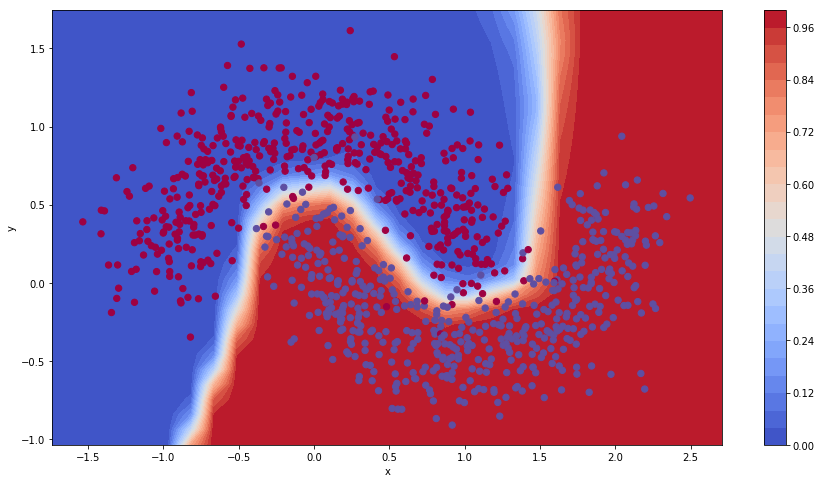

In [18]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (15,8))

plot_decision_region(classifier, x_train, pred_fun)
#plot_data(x_train, y_train)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()